### Part1. Sphere Project

In [1]:
'''
Only import following libraries
+ Setup Sphere parameters
'''
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import cos  # (not used here but imported as required)
import numpy as np

# Given Sphere radius
r = 100

# Determine resolution, higher means better quality(tested with 100~1000)
num_points = 1000

#### For this project, we work individually and then combined each other's code to make the final submition. 

- When we combined, we realized that one person visualize the sphere and the light surface in 2D dimention while other person visualizing it in 3D space. So, When we merge the code, we had to make Helper functions to ahcieve both visualization.

In [2]:
'''
Helper Functions for 
- calculation, 
- normalization 
- change into cartesian points
- get intensity
- initialize the 3D point of view
'''
# Nor sure IF we are allowed to use np.linspace to create a grid of (x,y) value over the square [r, r ] x [-r, r]
# so we create custom_linspace 
def custom_linspace(start, stop, num_points):
    step = (stop - start) / (num_points - 1)
    result = [0] * num_points
    for i in range(num_points):
        result[i] = start + i * step
        
    return result

# Convert spherical coordinates to Cartesian coordinates
def to_cartesian(r, thetas, phies):
    x, y, z = [], [], []
    for i in thetas:
        xi, yi, zi = [], [], []
        for j in phies:
            xi.append(r * np.sin(i) * np.cos(j))
            yi.append(r * np.sin(i) * np.sin(j))
            zi.append(r * np.cos(i))
        x.append(xi)
        y.append(yi)
        z.append(zi)
    return np.array(x), np.array(y), np.array(z)

# Convert a single point from spherical to Cartesian coordinates
def to_cartesian_singlepoint(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

# Vector Normalization
def normalize(*args):
    norm = sum(arg**2 for arg in args) ** 0.5
    return [arg / norm for arg in args]

# Initialize 3D axis
def init_3d_ax(ax):
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(False)
    ax.set_axis_off()
    ax.set_box_aspect([1, 1, 1])
    ax.set_xlim(-130, 130)
    ax.set_ylim(-130, 130)
    ax.set_zlim(-130, 130)

# Calculate light intensity at surface points
def get_intensity(r, x, y, z, l):
    Nx = (x / r)
    Ny = (y / r)
    Nz = (z / r)
    
    # 빛 벡터 정규화
    Lx, Ly, Lz = normalize(np.array(l[0]), np.array(l[1]), np.array(l[2]))
    
    # 코사인 법칙으로 강도 계산
    return np.maximum(0, Lx * Nx + Ly * Ny + Lz * Nz)

### Derivatives computed by hand, then add to jupyter notebook how we solved it:
- z(x,y) = sqrt(r^2 - x^2 - y^2)

- dz/dx = -x / sqrt(r^2 - x^2 - y^2)
    
- dz/dy = -y / sqrt(r^2 - x^2 - y^2)

### Thus the unnormalized normal vector would be:

- n = (-dz/dx, -dz/dy, 1) = (x/sqrt(r^2 - x^2 - y^2), y/sqrt(r^2 - x^2 - y^2), 1)

### When normalized, this becomes:

- n_normalized = (x/r, y/r, z/r)

#### which is the standard result for a sphere.
- Inference to make sure our calculation is correct : https://www.youtube.com/watch?v=g1BEkYyGFLc&ab_channel=TheMathSorcerer 

2D Sphere Visualization


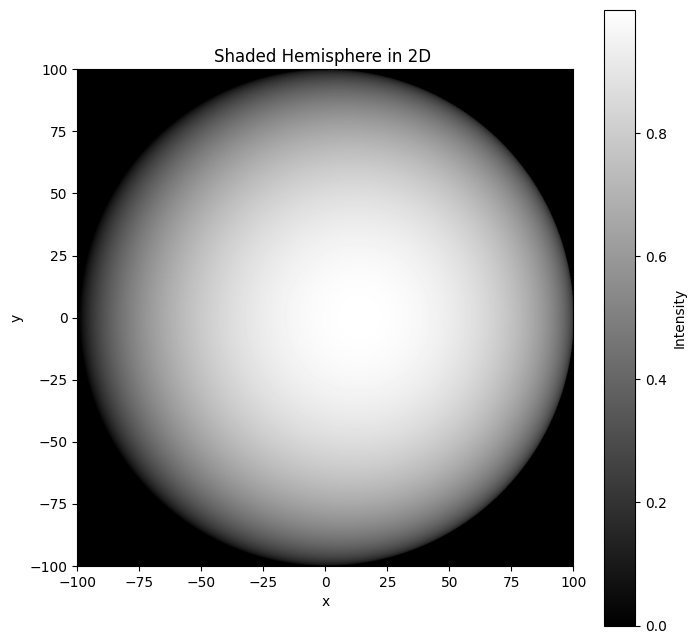

In [3]:
'''
Visualize Sphere in 2D
'''
# Create grid coordinates
x = custom_linspace(-r, r, num_points)
y = custom_linspace(-r, r, num_points)

# Instead of using np.meshgrid, create 2D arrays manually
X = np.zeros((num_points, num_points))
Y = np.zeros((num_points, num_points))

# Fill the arrays with the appropriate values
for i in range(num_points):
    for j in range(num_points):
        X[i, j] = x[j]  # x values vary along columns
        Y[i, j] = y[i]  # y values vary along rows

# Add mask parameter to "Only" consider the points within the circle x^2 + y^2 <= r^2
mask = X**2 + Y**2 <= r**2 # Simply add mask to the value

# Parametrization for the positive (upper) hemisphere:
# z = sqrt(r^2 - x^2 - y^2)
Z = np.zeros_like(X)
Z[mask] = np.sqrt(r**2 - X[mask]**2 - Y[mask]**2)

# Define the illumination direction and normalize it
I = np.array([0.13, 0, 0.94])
I = I / np.linalg.norm(I)

# Compute intensity using the cosine law:
# intensity = n_normalized · I = (x/r)*I[0] + (y/r)*I[1] + (z/r)*I[2] 

#Since we masked the circle, we used following method below 
intensity = np.zeros_like(X)
intensity[mask] = (X[mask] / r * I[0] +
                   Y[mask] / r * I[1] +
                   Z[mask] / r * I[2])

# Clip intensity range
intensity = np.clip(intensity, 0, 1)

# Cell 3: Display 2D Hemisphere
print("2D Sphere Visualization")
plt.figure(figsize=(8, 8))
plt.imshow(intensity, extent=(-r, r, -r, r), origin='lower', cmap='gray')
plt.colorbar(label='Intensity')
plt.title('Shaded Hemisphere in 2D ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


3D Sphere Visualization


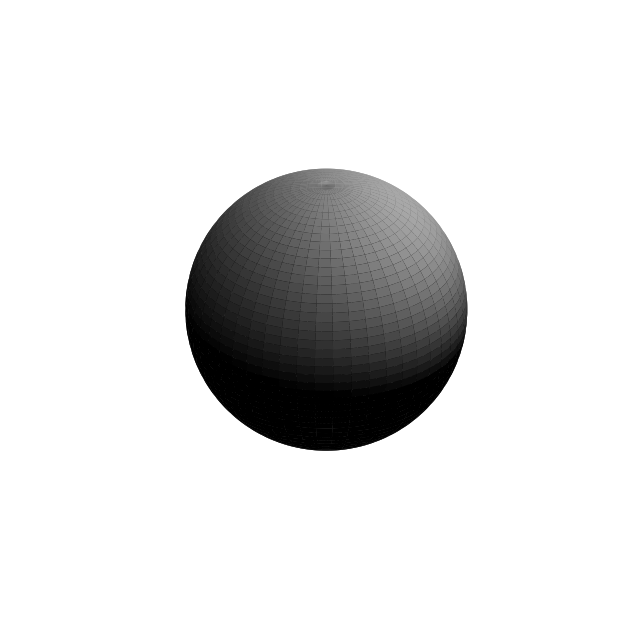

In [4]:

# Cell 4: Set up 3D Visualization
print("3D Sphere Visualization")

# Create spherical coordinate samples
theta = np.linspace(0, np.pi, num_points)
phi = np.linspace(0, 2*np.pi, num_points)

# Convert to Cartesian coordinates
x_3d, y_3d, z_3d = to_cartesian(r, theta, phi)

# Calculate intensity
intensity_3d = get_intensity(r, x_3d, y_3d, z_3d, [0.13, 0, 0.94])

# Create 3D plot
figure = plt.figure(figsize=(8, 8))
ax = figure.add_subplot(111, projection='3d')
init_3d_ax(ax)

# Apply colormap
colormap = plt.cm.gray(intensity_3d)
ax.plot_surface(x_3d, y_3d, z_3d, facecolors=colormap, edgecolor='none')
plt.show()

### Bonus Question(10 points): 

- Insert code that creates an animation with a moving light source that moves around the sphere with 30 different frames [in any way you like]! You are allowed to import further libraries for this, of course.


In [5]:
'''
Import Libraries & also setup Ipython for animation in Jupyter Environment
'''
import matplotlib.animation as animation
from IPython.display import HTML
# Jupyter에서 애니메이션을 보기 위한 설정
from matplotlib import rc
rc('animation', html='jshtml')

In [6]:
'''
Function to animate the moving light and it's reaction to the surface of sphere in 2D
'''
def create_2d_animation():
    # Initialize plot
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(intensity, extent=(-r, r, -r, r), origin='lower', cmap='gray')
    ax.set_title('Hemisphere at First Frame')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(im, ax=ax, label='Intensity')
    
    # Frame update function
    def update_frame(frame):
        # Calculate angle for current frame
        theta = 2 * np.pi * frame / 30.0
        # Light source moves in x-y plane
        I = np.array([0.13 * np.cos(theta), 0.13 * np.sin(theta), 0.94])
        I = I / np.linalg.norm(I)
        
        # Recalculate intensity for current light direction
        new_intensity = np.zeros_like(X)
        new_intensity[mask] = (X[mask] / r * I[0] +
                              Y[mask] / r * I[1] +
                              Z[mask] / r * I[2])
        new_intensity = np.clip(new_intensity, 0, 1)
        
        # Update image data
        im.set_array(new_intensity)
        ax.set_title(f'Shaded Hemisphere (Frame {frame+1})')
        return [im]
    
    # Create animation with 30 frames, 200ms interval
    anim = animation.FuncAnimation(fig, update_frame, frames=30, interval=200, blit=True)
    return anim

Creating 2D animation...


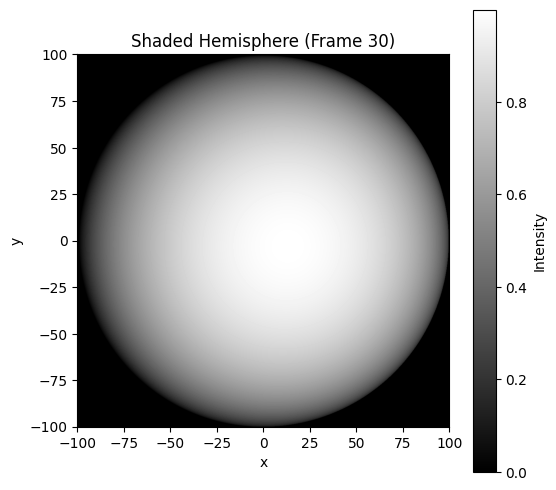

In [7]:
print("Creating 2D animation...")
anim_2d = create_2d_animation()
display(anim_2d)

In [8]:
'''
Function to animate the moving light and it's reaction to the surface of sphere in 3D
'''
def create_3d_animation():
    # Initialize plot
    figure = plt.figure(figsize=(6, 6))
    ax = figure.add_subplot(111, projection='3d')
    
    # Frame update function
    def update_intensity(frame):
        ax.clear()
        init_3d_ax(ax)
        
        # Move light source
        theta_light = np.pi/2
        phi_light = 2 * np.pi * (frame+1)/30
        ls_offset = 50
        
        lx, ly, lz = to_cartesian_singlepoint(r=r+ls_offset, theta=theta_light, phi=phi_light)
        intensity = get_intensity(r, x_3d, y_3d, z_3d, (lx, ly, lz))
        colormap = plt.cm.gray(intensity)
        
        # Draw sphere and light source
        surface = ax.plot_surface(x_3d, y_3d, z_3d, facecolors=colormap, edgecolor='none')
        light_point = ax.scatter(lx, ly, lz, color='red', s=20)
        coord_text = f"({lx:.1f}, {ly:.1f}, {lz:.1f})"
        light_coord = ax.text(lx, ly, lz, coord_text, color='black', fontsize=8)
        
        return [surface, light_point, light_coord]
    
    # Create 30-frame animation
    anim = animation.FuncAnimation(figure, update_intensity, frames=30)
    return anim

Creating 3D animation...


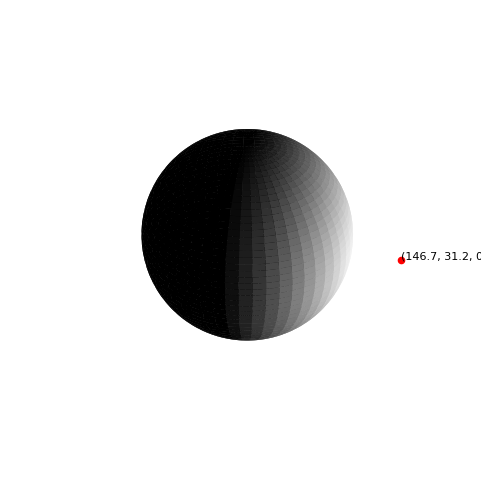

In [9]:
print("Creating 3D animation...")
anim_3d = create_3d_animation()
display(anim_3d)